# Random Forest Regression of the defence of NFL teams through the 2018-21 seasons 

Import all necessary libraries, modules. The dataframe chosen to be used includes the predictions made, the points allowed, points allowed per game(from ProFootballReference) and the point projection which is the points allowed divided by games played and multiplied by 17.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy import stats
import matplotlib.colors as mcolors
from scipy.stats import rankdata
import seaborn as sns
df = pd.read_csv (r'C:\Users\Rob\Documents\DPrediction.csv')
print (df)

                    Teams  G    Pred   PA  Pts/G  Point Projection
0       Arizona Cardinals  7  403.81  176   25.1        427.428571
1         Atlanta Falcons  7  417.04  171   24.4        415.285714
2        Baltimore Ravens  7  366.11  161   23.0        391.000000
3           Buffalo Bills  6  244.86   81   13.5        229.500000
4       Carolina Panthers  7  383.66  149   21.3        361.857143
5           Chicago Bears  7  356.37  132   18.9        320.571429
6      Cincinnati Bengals  7  333.45  132   18.9        320.571429
7        Cleveland Browns  7  433.72  186   26.6        451.714286
8          Dallas Cowboys  7  306.83  104   14.9        252.571429
9          Denver Broncos  7  310.67  115   16.4        279.285714
10          Detroit Lions  6  478.28  194   32.3        549.666667
11      Green Bay Packers  7  415.52  146   20.9        354.571429
12         Houston Texans  6  406.59  137   22.8        388.166667
13     Indianapolis Colts  7  398.99  140   20.0        340.00

Make a new attribute by dividing the predictions by 17 to get the value of the points prediction allowed per game.

In [94]:
preg = df['Pred']/17
df['Pred/G'] = preg
df

,Teams,G,Pred,PA,Pts/G,Point Projection,Pred/G
0,Arizona Cardinals,7,403.81,176,25.1,427.428571,23.753529
1,Atlanta Falcons,7,417.04,171,24.4,415.285714,24.531765
2,Baltimore Ravens,7,366.11,161,23.0,391.000000,21.535882
3,Buffalo Bills,6,244.86,81,13.5,229.500000,14.403529
4,Carolina Panthers,7,383.66,149,21.3,361.857143,22.568235
5,Chicago Bears,7,356.37,132,18.9,320.571429,20.962941
6,Cincinnati Bengals,7,333.45,132,18.9,320.571429,19.614706
7,Cleveland Browns,7,433.72,186,26.6,451.714286,25.512941
8,Dallas Cowboys,7,306.83,104,14.9,252.571429,18.048824
9,Denver Broncos,7,310.67,115,16.4,279.285714,18.274706


### Scatter Graph

Scatter the projected points allowed and the prediction for points allowed.

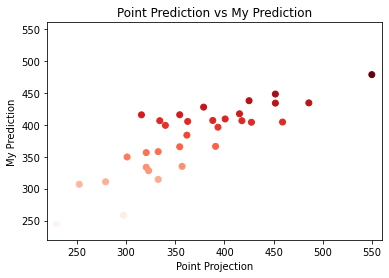

In [95]:
plt.scatter(df['Point Projection'], df['Pred'], c = df['Pred'], cmap = 'Reds')
plt.xlabel('Point Projection')
plt.ylabel('My Prediction')
plt.title('Point Prediction vs My Prediction')
plt.xlim(220,560)
plt.ylim(220,560)
plt.show()

### Defining Variables

Define the variables and reshape them to allow a linear regression to be conducted easier.

In [96]:
pp = df['Point Projection']
pp = np.array(pp).reshape((-1,1))
pre = df['Pred']
preg = df['Pred/G']
preg = np.array(preg).reshape(-1,1)
pg = df['Pts/G']

### Linear Regression

Conduct the linear regression for the predicted and projected points allowed per game

In [97]:
model = LinearRegression()
model = LinearRegression().fit(preg, pg)

r_sq = model.score(preg, pg)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.6817815162467973
intercept: -1.6450878163398777
slope: [1.04538607]


In [104]:
yr_proj = df['Point Projection']
preg = df['Pred']/17

### Projection and Prediction Comparison

First display the difference between the prediction and the projected points allowed. In this model it is appropriate to do this for both full year and per game data to test that they share the same correlation coefficient. The per game data is more valuable as it makes it easier to identify how diferent the predictions and projections are as points in the NFL are often 3 or 7. the numbers 2 ,6 and 8 can also occur but are less common and situational which cant be controlled for by this model.
The sum of all and squared differences should be provided also. 

In [107]:
print("difference:", pre - yr_proj)
print("Sum of All Differences:", np.sum(np.abs(pre - yr_proj)))
print("Sum of Squared Differences:", np.sum(np.square(pre - yr_proj)))
print("correlation:", np.corrcoef(np.array((pre, yr_proj)))[0, 1])

difference: 0    -23.618571
1      1.754286
2    -24.890000
3     15.360000
4     21.802857
5     35.798571
6     12.878571
7    -17.994286
8     54.258571
9     31.384286
10   -71.386667
11    60.948571
12    18.423333
13    58.990000
14    25.075714
15   -11.514286
16    12.510000
17   -54.880000
18   -22.130000
19     8.245714
20    71.896667
21    10.878571
22   -51.614286
23    99.705714
24   -18.304286
25   -39.300000
26     2.641429
27     5.060000
28    -3.814286
29    48.357143
30    42.423333
31    48.602857
dtype: float64
Sum of All Differences: 1026.4428569
Sum of Squared Differences: 51029.10812112315
correlation: 0.8250897929685962


In [108]:
print("difference:", preg - pg)
print("Sum of All Differences:", np.sum(np.abs(preg - pg)))
print("Sum of Squared Differences:", np.sum(np.square(preg - pg)))
print("correlation:", np.corrcoef(np.array((preg, pg)))[0, 1])

difference: 0    -1.346471
1     0.131765
2    -1.464118
3     0.903529
4     1.268235
5     2.062941
6     0.714706
7    -1.087059
8     3.148824
9     1.874706
10   -4.165882
11    3.542353
12    1.117059
13    3.470000
14    1.446471
15   -0.705882
16    0.735882
17   -3.228235
18   -1.301765
19    0.456471
20    4.195882
21    0.597059
22   -3.064706
23    5.836471
24   -1.105294
25   -2.311765
26    0.198235
27    0.297647
28   -0.252941
29    2.858824
30    2.528824
31    2.844706
dtype: float64
Sum of All Differences: 60.26470588235294
Sum of Squared Differences: 175.26139377162627
correlation: 0.825700621440239


### New DataFrame

Make a new dataframe that displays the difference for each team.

The difference used is the prediction - the projection. 

Therefore, a negative number suggests that a team is conceding less than predicted. A positive number suggests that a team is conceding more points than predicted. 

This model has shown 8 teams out of 32 have deviated from the prediction by more than 3.01 points (3 points for a field goal) and none are 7 or further away.

This can be considered a success as the majority of the teams points allowed are less than a field goal.

In addition, the situational factors could explain some of the deviance such as a team attempting a 4th down try, late into games, instead of a field goal 
and getting a Touchdown when earlier in the game would unlikely occur. Similarly turnovers and poor field position are other factors that have not been included in this model which could explain for the deviance.

In [116]:
Teams = ('Arizona Cardinals','Atlanta Falcons','Baltimore Ravens','Buffalo Bills','Carolina Panthers','Chicago Bears','Cincinnati Bengals','Cleveland Browns','Dallas Cowboys','Denver Broncos','Detroit Lions','Green Bay Packers','Houston Texans','Indianapolis Colts','Jacksonville Jaguars','Kansas City Chiefs','Las Vegas Raiders','Los Angeles Chargers','Los Angeles Rams','Miami Dolphins','Minnesota Vikings','New England Patriots','New Orleans Saints','New York Giants','New York Jets','Philadelphia Eagles','Pittsburgh Steelers','San Francisco 49ers','Seattle Seahawks','Tampa Bay Buccaneers','Tennessee Titans','Washington Commanders',         )
df1 = pd.DataFrame(columns=['Teams'])
df1['Teams'] = Teams
diff = preg - pg
df1['P/G Diff'] = diff
df1

,Teams,P/G Diff
0,Arizona Cardinals,-1.346471
1,Atlanta Falcons,0.131765
2,Baltimore Ravens,-1.464118
3,Buffalo Bills,0.903529
4,Carolina Panthers,1.268235
5,Chicago Bears,2.062941
6,Cincinnati Bengals,0.714706
7,Cleveland Browns,-1.087059
8,Dallas Cowboys,3.148824
9,Denver Broncos,1.874706


### Bar Chart

create a bar chart to show the variation in the prediction compared to the projection for ech team

<function matplotlib.pyplot.show(close=None, block=None)>

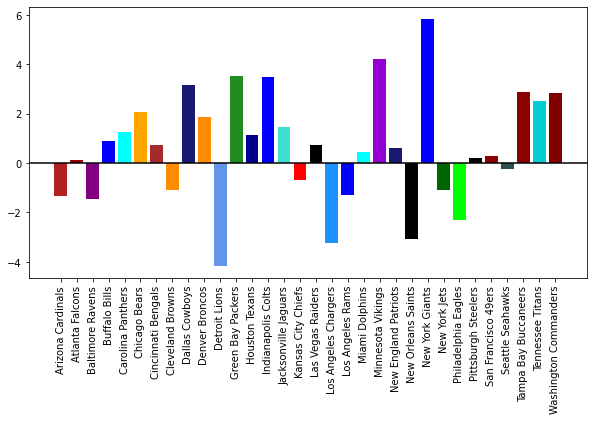

In [113]:
plt.figure(figsize=(10,5))
plt.bar(df1['Teams'], df1['P/G Diff'],color = ['firebrick','darkred','purple','blue','cyan', 'orange', 'brown','darkorange', 'midnightblue', 'darkorange', 'cornflowerblue', 'forestgreen', 'darkblue', 'blue', 'turquoise', 'red','black','dodgerblue','blue','aqua', 'darkviolet','midnightblue','black', 'blue','darkgreen','lime','black','darkred','darkslategray','darkred','darkturquoise','maroon' ])
plt.axhline(y = 0, color = 'black', linestyle = '-')

plt.xticks(rotation=90)
plt.show

In [41]:
df1.to_csv(r'C:\Users\Rob\Documents\DPredDiff.csv', index = False)